# Homework 5: Part II
    
## Answer the following with respect to $p(\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y})$ on the previous slide
    
1. Rewrite $p(\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y})$ in terms of $\sigma^2$ (no longer using $\Sigma$) if $\Sigma=\sigma^2I$

2. What is $E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}]$?

3. What ***hyperparameters*** values (legal or illegal) would make $E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = (\mathbf{X^\top X})^{-1}\mathbf{X^\top y}$?

4. What ***hyperparameters*** values (legal or illegal) would make $E[  \mathbf{\hat y} = \mathbf{X}\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = \mathbf{X}(\mathbf{X^\top X})^{-1}\mathbf{X^\top y}$?

5. What is $\text{Var}[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}]$?

In [2]:
import pymc as pm; import numpy as np; import pandas as pd
# Load the dataset
df = pd.read_csv('housing.csv')
# Relevant columns
X = df[['median_income']].values  # Predictor variable: median income
y = df['median_house_value'].values  # Response variable: house value
# Reshape y to match the expected dimensions
y = y.reshape(-1, 1)
# Define the number of samples (n) and predictors (p)
n, p = X.shape

In [3]:
# Set Priors and Likelihood
with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros((p, 1)), cov=np.eye(p), shape=(p, 1))
    sigma = pm.TruncatedNormal('sigma', mu=1, sigma=1, lower=0)
    y_obs = pm.Normal('y_obs', mu=pm.math.dot(X, betas), sigma=sigma, observed=y)

# Sampling
with MLR:
  idata = pm.sample()

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

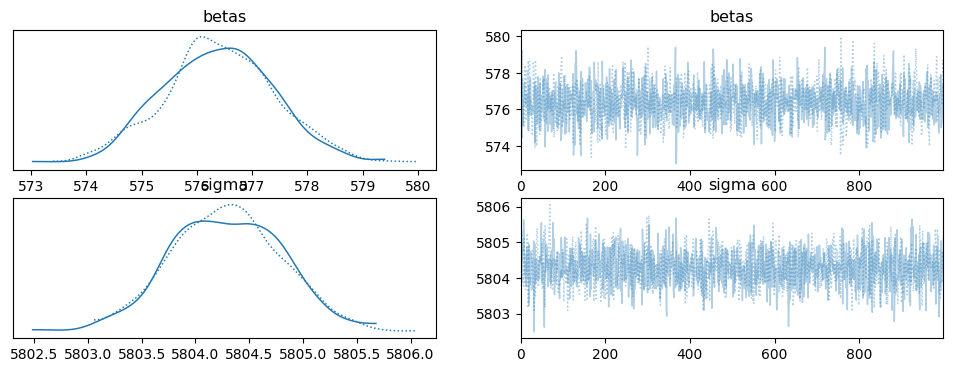

In [4]:
import arviz as az
# Trace plots
az.plot_trace(idata)

![IMG_F9A6E817EB89-1.jpeg](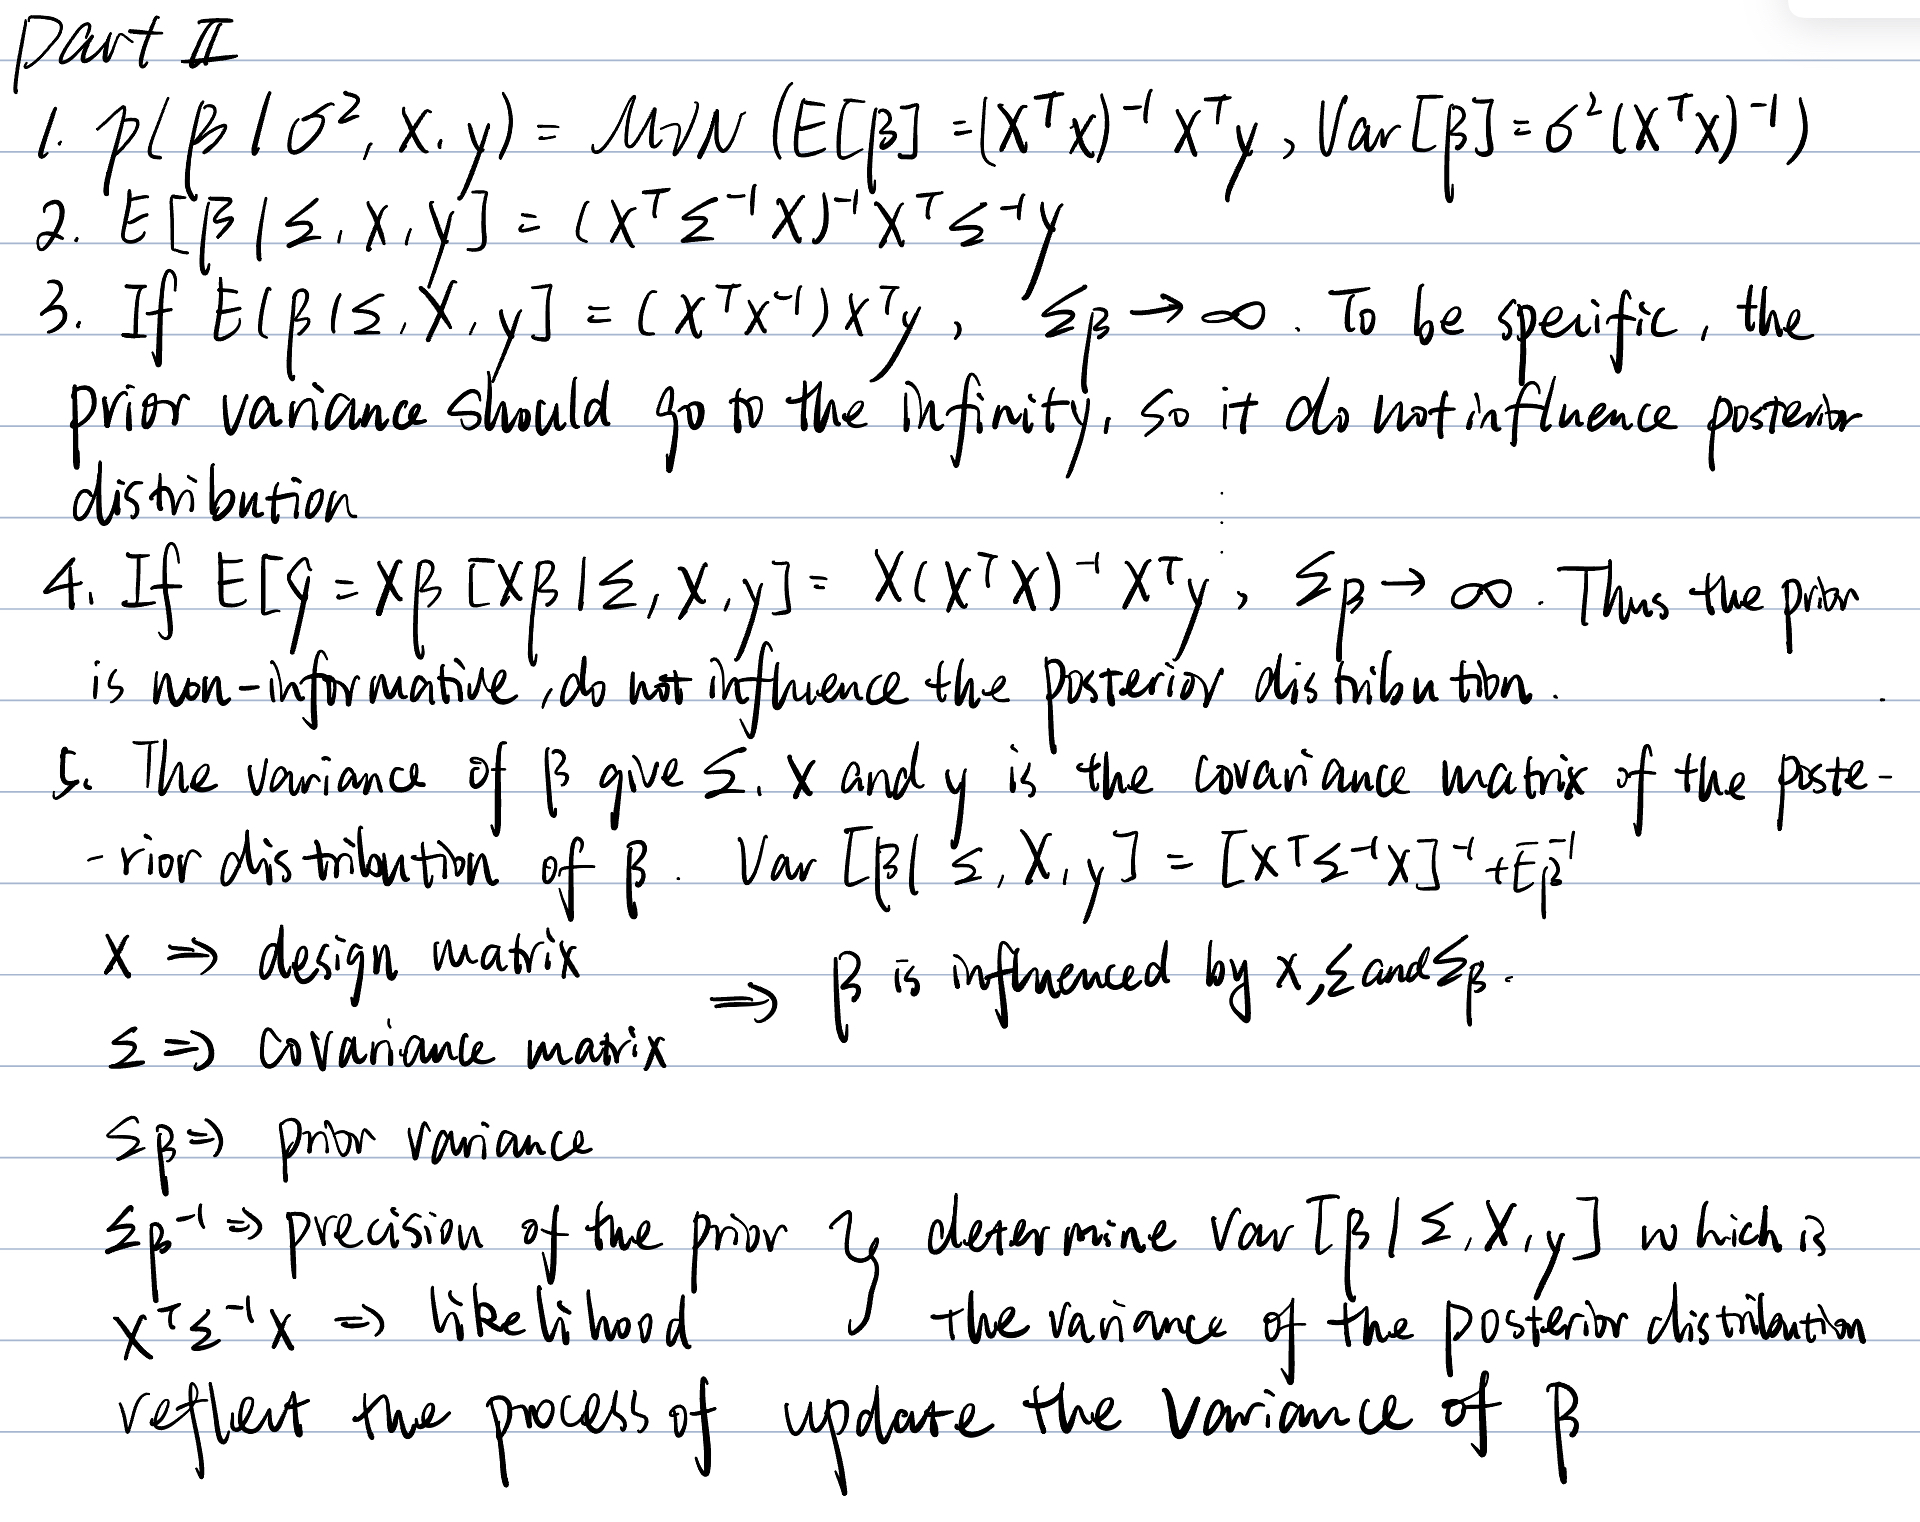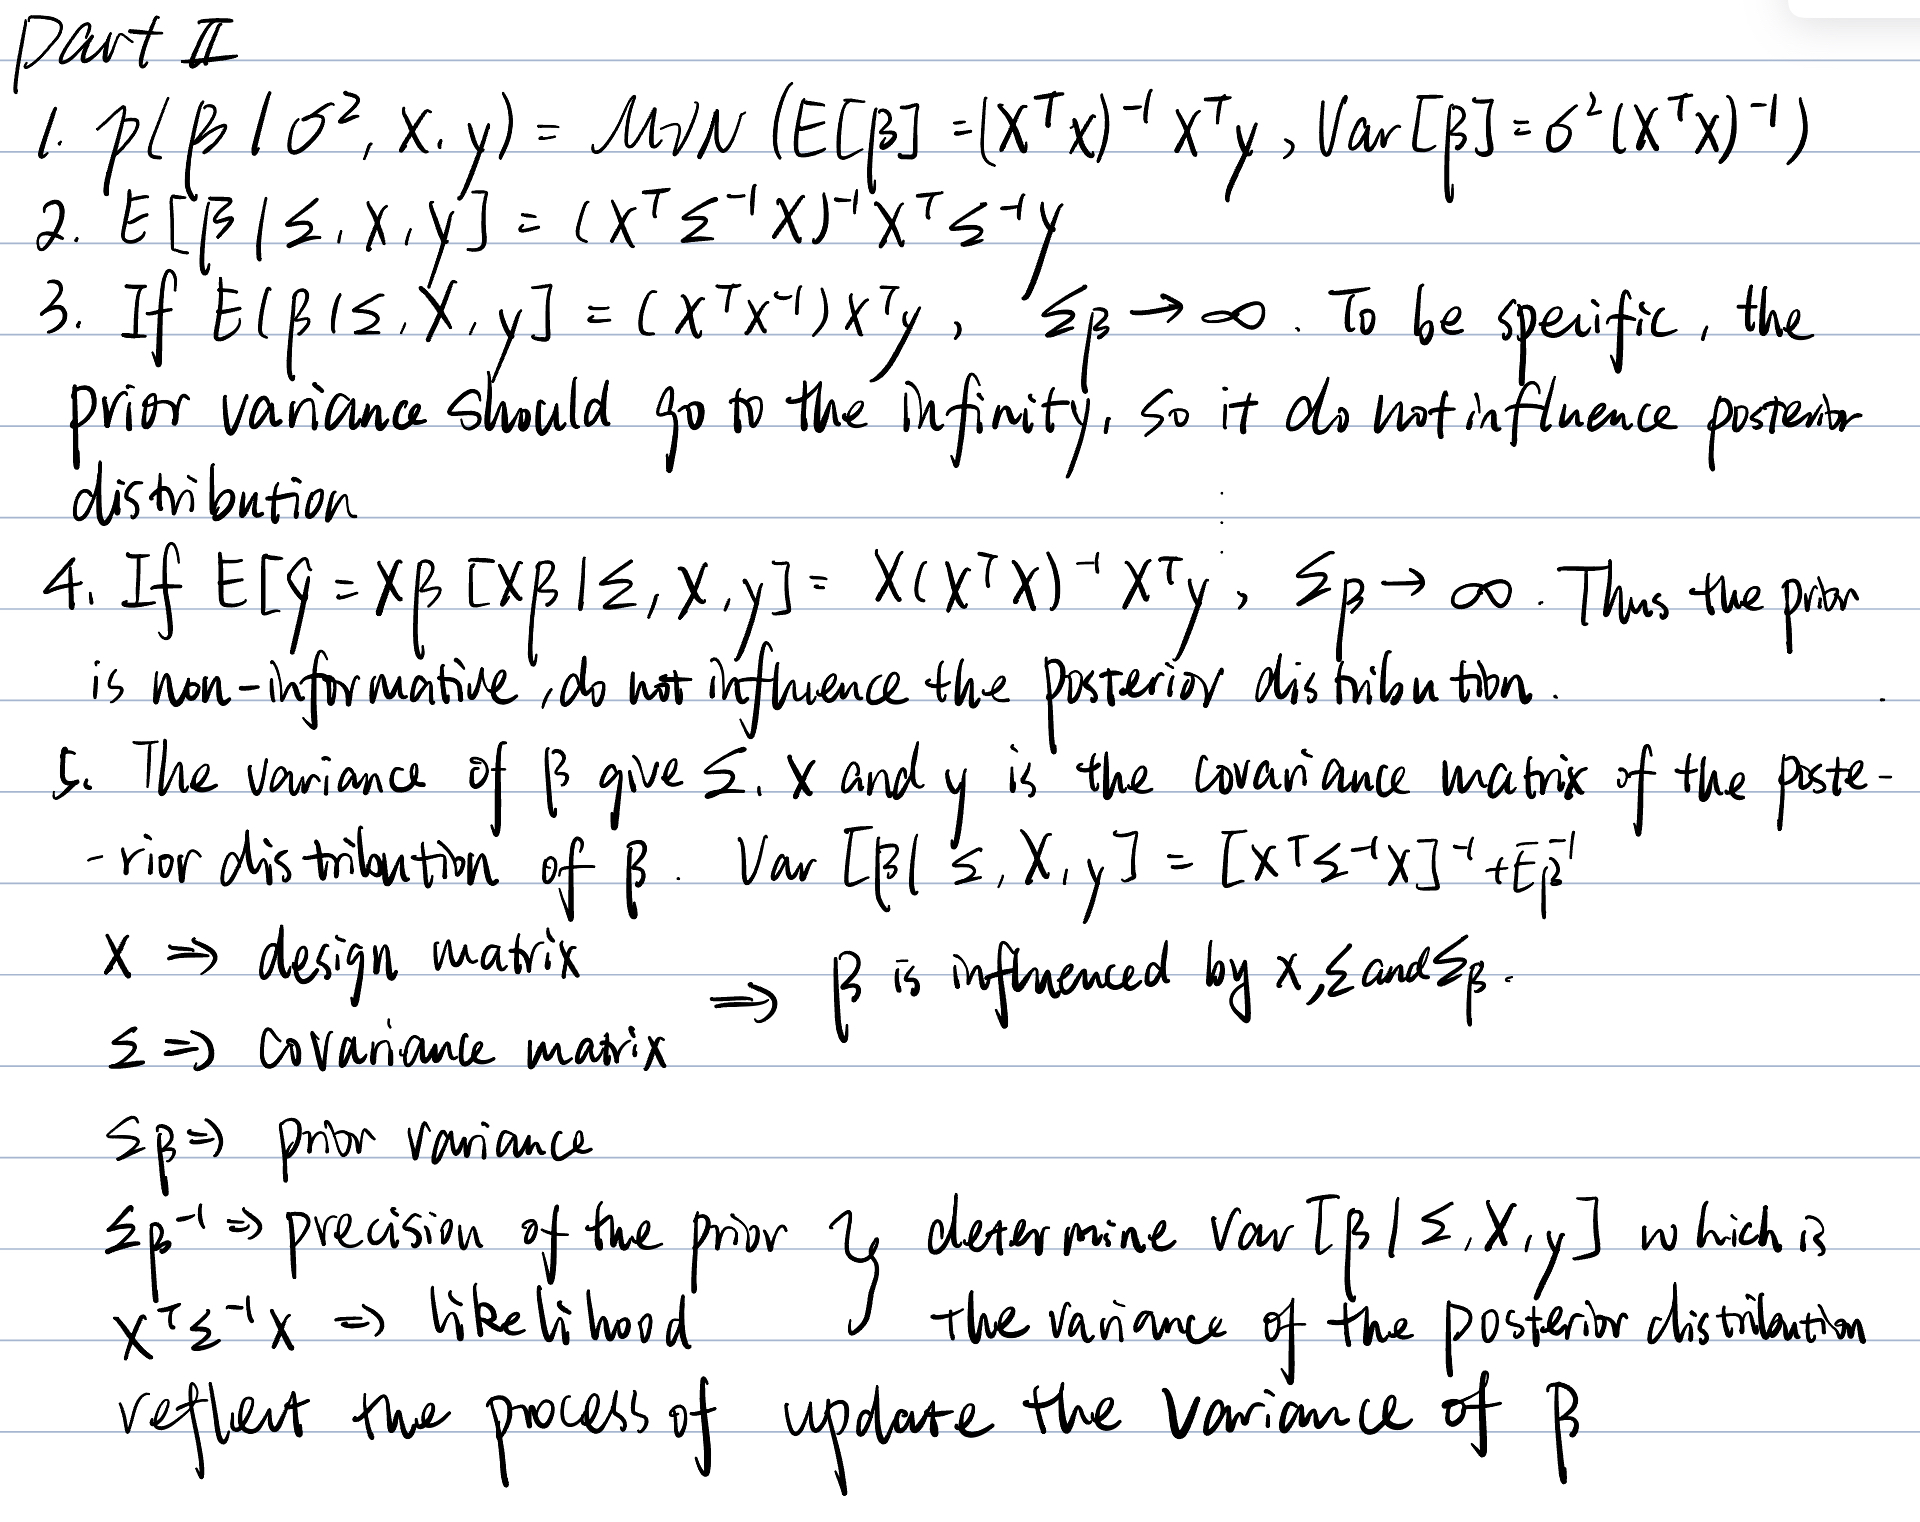)

# Homework 5: Part II
    
## Answer the following with respect to $p(\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y})$ on the previous slide
    
1. Rewrite $p(\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y})$ in terms of $\sigma^2$ (no longer using $\Sigma$) if $\Sigma=\sigma^2I$

2. What is $E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}]$?

3. What ***hyperparameters*** values (legal or illegal) would make $E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = (\mathbf{X^\top X})^{-1}\mathbf{X^\top y}$?

4. What ***hyperparameters*** values (legal or illegal) would make $E[  \mathbf{\hat y} = \mathbf{X}\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = \mathbf{X}(\mathbf{X^\top X})^{-1}\mathbf{X^\top y}$?

5. What is $\text{Var}[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}]$?

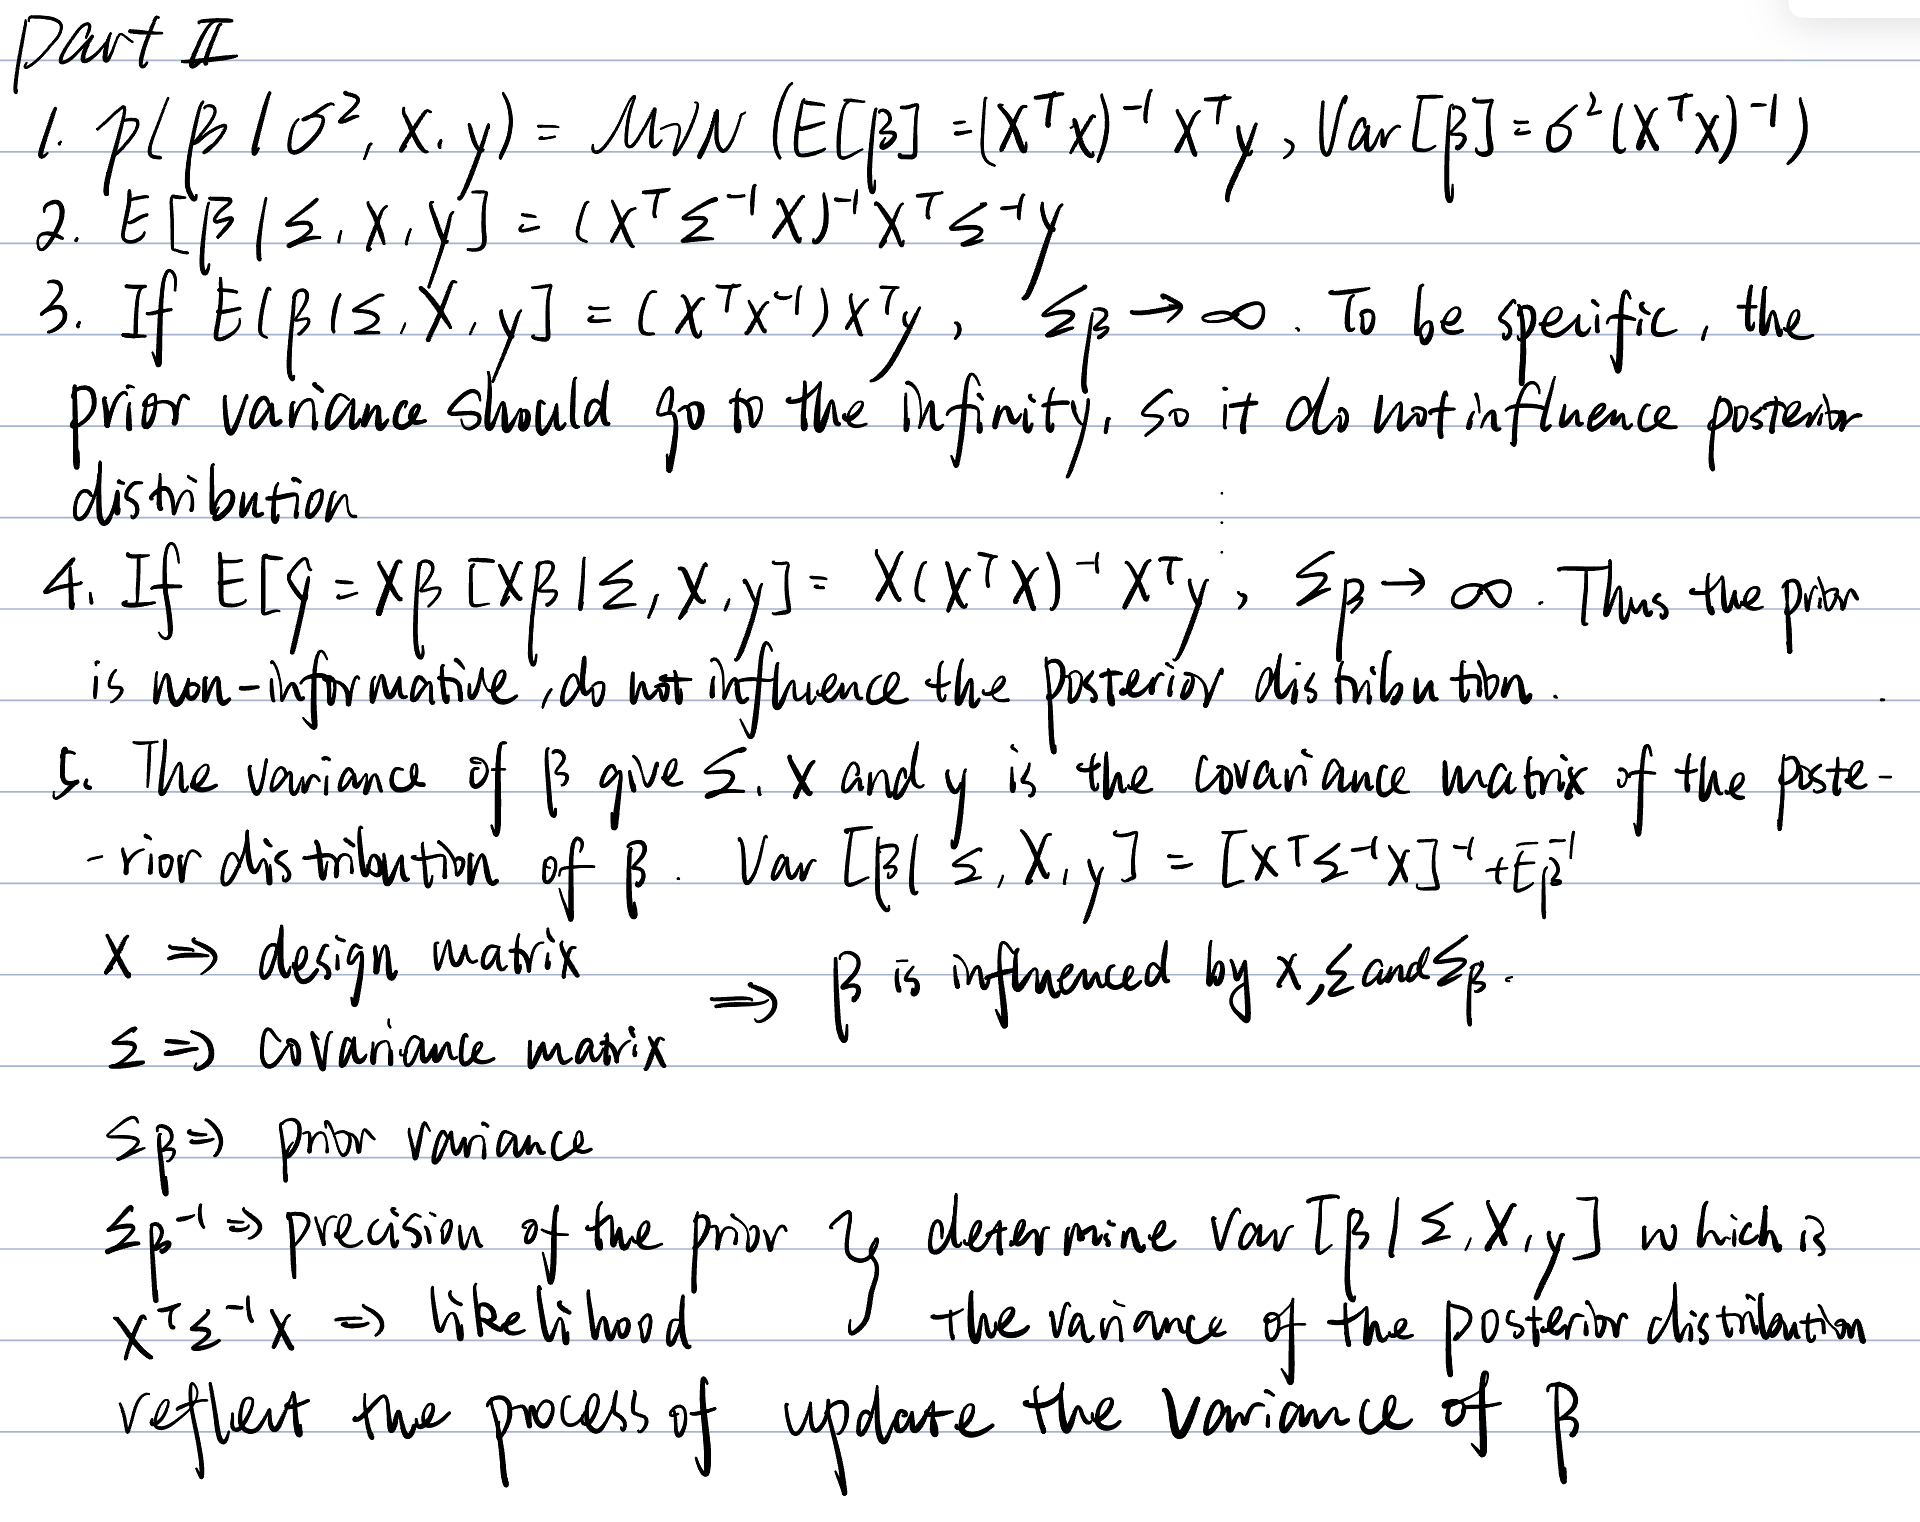

# Homework 5: Part III

1. Go get data from kaggle.com and perform inference for a ***Bayesian Multivariate Normal Model***

<SPAN STYLE="font-size:18.0pt">

```python
import numpy as np; from scipy import stats
p=10; Psi=np.eye(p); a_cov = stats.invwishart(df=p+2, scale=Psi).rvs(1)
n=1000; y=stats.multivariate_normal(mean=np.zeros(p), cov=a_cov).rvs(size=n)
# Replace this made up data with your data set from kaggle...
    
with pm.Model() as MNV_LKJ:
    packed_L = pm.LKJCholeskyCov("packed_L", n=p, eta=2.0,
                                 sd_dist=pm.Exponential.dist(1.0, shape=2), compute_corr=False)
    L = pm.expand_packed_triangular(p, packed_L)
    # Sigma = pm.Deterministic('Sigma', L.dot(L.T)) # Don't use a covariance matrix parameterization
    mu = pm.MvNormal('mu', mu=np.array(0), cov=np.eye(p), shape=p);
    # y = pm.MvNormal('y', mu=mu, cov=Sigma, shape=(n,1), observed=y)
    # Figure out how to parameterize this with a Cholesky factor to improve computational efficiency
with MNV_LKJ    
    idata = pm.sample()
```    
</SPAN>

2. As indicated above, don't use a covariance matrix parameterization and instead figure out how to parameterize this with a ***Cholesky factor*** to improve computational efficiency. The ***Cholesky***-based formulation allows general $O(n^3)$ $\det({\boldsymbol \Sigma})$ to be computed using a simple $O(n)$ product and general $O(n^3)$ ${\boldsymbol \Sigma}^{-1}$ to be instead evaluated with $O(n^2)$ ***backward substitution***.

2. Specify ***priors*** that work: certainly you'll likely need to change the ***prior hyperparameters*** for $\boldsymbol \mu$ (`mu`) and $\mathbf{R}$ (`packed_L`)...
    1. And you could consider adjusting the ***prior*** for $\boldsymbol \sigma$ using `sd_dist`...

3. [Optional] Assess the performance of the MCMC and note any issues

    1. Traceplots, inference (credible) intervals, effective sample sizes, energy plots, warnings and other notes... just the usual stuff they do [here](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#pymc-overview)



In [17]:
import pymc as pm; import numpy as np; import pandas as pd
# Load and prepare the data
house_data = pd.read_csv('housing.csv')
house_data = house_data[['median_income', 'median_house_value']]  # Select features
house_standardized = (house_data- house_data.mean()) / house_data.std()  # Standardize
n, p = house_standardized.shape
y = house_standardized.values

with pm.Model() as MNV_LKJ:
    packed_L = pm.LKJCholeskyCov("packed_L", n=p, eta=2.0, sd_dist=pm.Exponential.dist(1.0, shape=p), compute_corr=False)
    L = pm.expand_packed_triangular(p, packed_L)
    mu = pm.MvNormal('mu', mu=np.zeros(p), cov=np.eye(p)*1e-6, shape=p)
    sigma = pm.Deterministic('Sigma', L.dot(L.T))
    obs = pm.MvNormal('obs', mu=mu, chol=L, observed=y)

In [14]:
with MNV_LKJ:
    idata = pm.sample(1500)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


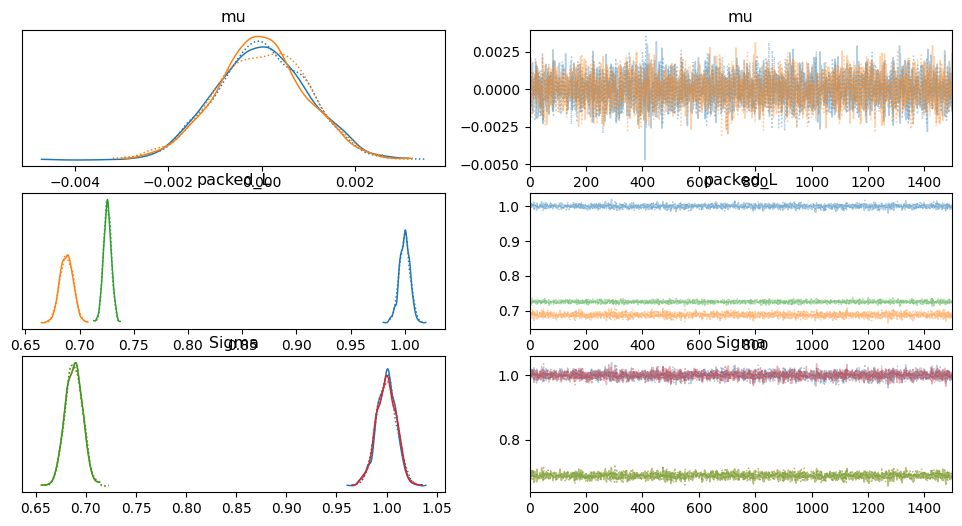

In [20]:
import arviz as az
# Trace plots
az.plot_trace(idata)
summary = pm.summary(idata)